In [155]:
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt

# Avg delay of sales per month

In [23]:
PATH = "./suncharge/Sales.csv"
df = pd.read_csv(PATH)

In [24]:
data = df[["RequestedDeliveryDate", "DeliveryDate"]]
data = data.values

In [25]:
print(data)

[['2024-11-15' '2024-11-15']
 ['2023-06-15' '2023-06-12']
 ['2022-04-15' '2022-04-15']
 ...
 ['2022-12-23' '2022-12-22']
 ['2022-07-12' '2022-07-08']
 ['2024-11-15' '2024-11-26']]


In [26]:
def days_difference(date_str1, date_str2):
    # Convert date strings to datetime objects
    date1 = datetime.strptime(date_str1, '%Y-%m-%d')
    date2 = datetime.strptime(date_str2, '%Y-%m-%d')

    # Compute the difference between the two dates
    difference = date2 - date1

    # Return the number of days as absolute value
    return difference.days


In [27]:
dp = data[40]
days_difference(dp[0], dp[1])

-4

In [28]:
result = {}
for dp in data:
    date_of_sale = dp[1]
    requested_date_of_sale = dp[0]

    year = date_of_sale.split("-")[0]
    month = date_of_sale.split("-")[1]
    result.setdefault(year, {})
    result[year].setdefault(month, [])
    result[year][month].append(days_difference(date_of_sale, requested_date_of_sale))

avg_result = {}
for year, year_data in result.items():
    avg_result[year] = {month: sum(month_data)/len(month_data) for month, month_data in year_data.items()}

In [29]:
print(json.dumps(avg_result, indent=2))

{
  "2024": {
    "11": 0.09796806966618288,
    "01": 0.08613589567604667,
    "06": 0.0,
    "02": 0.041116005873715125,
    "09": 0.04296125815113157,
    "04": -0.01667245571378951,
    "05": 0.12980269989615784,
    "10": -0.11032388663967611,
    "07": -0.1034363068379035,
    "08": -0.009308986752595776,
    "12": 0.04002808988764045,
    "03": 0.02207001522070015
  },
  "2023": {
    "06": 0.1104775481111903,
    "02": 0.03116583301269719,
    "11": -0.10327085630282984,
    "08": -0.0647282796815507,
    "04": 0.027286702536510377,
    "09": 0.10407766990291262,
    "01": -0.05726256983240224,
    "12": 0.039444850255661065,
    "03": 0.08231292517006802,
    "05": -0.09870388833499502,
    "07": -0.2789240972733972,
    "10": -0.12477969686288333
  },
  "2022": {
    "04": -0.013617960986382039,
    "03": -0.09922113105316627,
    "02": 0.31751662971175165,
    "11": -0.14227642276422764,
    "12": 0.0363963963963964,
    "10": -0.11760154738878142,
    "07": 0.16311800793937

# Supply Chain

In [30]:
PATH = "./suncharge/Purchases.csv"
df = pd.read_csv(PATH)

In [31]:
plant_key_map = {
    1001: "ANT1",
    1002: "WRO1",
    1003: "LYO1",
    1: "ANT1",
    2: "WRO1",
    3: "LYO1",
    4: "ANT2",
    5: "WRO2",
    6: "LYO2",
    7: "BIR2",
    8: "GOT2"
}

plant_customer_region_map = {
    "ANT2": ["Belgium", "Germany", "Netherlands"],
    "BIR2": ["United Kingdom"],
    "WRO2": ["Czech Republic", "Greece", "Hungary", "Poland"],
    "GOT2": ["Denmark", "Estonia", "Finland", "Latvia", "Lithuania", "Norway", "Sweden"],
    "LYO2": ["Croatia", "France", "Italy", "Portugal", "Slovenia", "Spain", "Switzerland"]

}

In [79]:
data = []
for data_point in df[list(df.columns[1:])].values:
    default = {
        "PurchaseOrder": None,
        "PurchaseOrderCreationDate": None,
        "VendorKey": None,
        "PlantKey": None,
        "MaterialKey": None,
        "MaterialPlantKey": None,
        "PurchaseOrderQuantity": None,
        "PlannedGoodsReceiptDate": None,
        "ActualGoodsReceiptDate": None,
        "PlannedArrivalDateYard": None,
        "ActualArrivalDateYard": None,
        "PlannedVendorShipmentDate": None,
        "ActualVendorShipmentDate": None
    }
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [70]:
data

[{'PurchaseOrder': 4500000001,
  'PurchaseOrderCreationDate': '2023-06-07',
  'VendorKey': 1002,
  'PlantKey': 5,
  'MaterialKey': 1,
  'MaterialPlantKey': 10005,
  'PurchaseOrderQuantity': 69,
  'PlannedGoodsReceiptDate': '2023-06-30',
  'ActualGoodsReceiptDate': '2023-07-04',
  'PlannedArrivalDateYard': '2023-06-28',
  'ActualArrivalDateYard': '2023-07-02',
  'PlannedVendorShipmentDate': '2023-06-27',
  'ActualVendorShipmentDate': '2023-07-01'},
 {'PurchaseOrder': 4500000002,
  'PurchaseOrderCreationDate': '2023-03-05',
  'VendorKey': 1001,
  'PlantKey': 7,
  'MaterialKey': 1,
  'MaterialPlantKey': 10007,
  'PurchaseOrderQuantity': 80,
  'PlannedGoodsReceiptDate': '2023-03-28',
  'ActualGoodsReceiptDate': '2023-03-24',
  'PlannedArrivalDateYard': '2023-03-26',
  'ActualArrivalDateYard': '2023-03-26',
  'PlannedVendorShipmentDate': '2023-03-25',
  'ActualVendorShipmentDate': '2023-03-25'},
 {'PurchaseOrder': 4500000003,
  'PurchaseOrderCreationDate': '2022-08-22',
  'VendorKey': 1002,

In [77]:
def days_difference(date_str1, date_str2):
    date1 = datetime.strptime(date_str1, '%Y-%m-%d')
    date2 = datetime.strptime(date_str2, '%Y-%m-%d')
    difference = date2 - date1
    return difference.days

def to_date(date_str1):
    return datetime.strptime(date_str1, '%Y-%m-%d')

In [85]:
for dp in data:
    vendor_shipment_date = to_date(dp["ActualVendorShipmentDate"])
    arrival_yard = to_date(dp["ActualArrivalDateYard"])
    goods_receipt = to_date(dp["ActualGoodsReceiptDate"])

    if arrival_yard < vendor_shipment_date:
        print("1:", dp["PurchaseOrder"], arrival_yard, vendor_shipment_date)
        break

    if goods_receipt < arrival_yard:
        print("2:", dp["PurchaseOrder"], arrival_yard, goods_receipt)
        break

2: 4500000002 2023-03-26 00:00:00 2023-03-24 00:00:00


In [72]:
processed_data = []
for dp in data:
    processed_data.append({
        "production_plant": plant_key_map[dp["VendorKey"]],
        "distribution_center": plant_key_map[dp["PlantKey"]],
        "delta_vendor_shipment_and_arrival_yard": days_difference(dp["ActualVendorShipmentDate"], dp["ActualArrivalDateYard"]),
        # "arrival_date_yard_delta": days_difference(dp["PlannedArrivalDateYard"], dp["ActualArrivalDateYard"]),
        "delta_goods_receipt_arrival_yard": days_difference(dp["ActualArrivalDateYard"], dp["ActualGoodsReceiptDate"]),
        "customer_region": plant_customer_region_map[plant_key_map[dp["PlantKey"]]]
    })
processed_data

[{'production_plant': 'WRO1',
  'distribution_center': 'WRO2',
  'delta_vendor_shipment_and_arrival_yard': 1,
  'delta_goods_receipt_arrival_yard_and': 2,
  'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
 {'production_plant': 'ANT1',
  'distribution_center': 'BIR2',
  'delta_vendor_shipment_and_arrival_yard': 1,
  'delta_goods_receipt_arrival_yard_and': -2,
  'customer_region': ['United Kingdom']},
 {'production_plant': 'WRO1',
  'distribution_center': 'GOT2',
  'delta_vendor_shipment_and_arrival_yard': 2,
  'delta_goods_receipt_arrival_yard_and': 2,
  'customer_region': ['Denmark',
   'Estonia',
   'Finland',
   'Latvia',
   'Lithuania',
   'Norway',
   'Sweden']},
 {'production_plant': 'ANT1',
  'distribution_center': 'ANT2',
  'delta_vendor_shipment_and_arrival_yard': 1,
  'delta_goods_receipt_arrival_yard_and': -2,
  'customer_region': ['Belgium', 'Germany', 'Netherlands']},
 {'production_plant': 'LYO1',
  'distribution_center': 'LYO2',
  'delta_vendor_shipm

In [73]:
data_sorted_by_production_plant = {}
for dp in processed_data:
    route = f"{dp['production_plant']}-{dp['distribution_center']}"
    data_sorted_by_production_plant.setdefault(route, [])
    data_sorted_by_production_plant[route].append(dp)

data_sorted_by_distribution_center = {}
for dp in processed_data:
    route = f"{dp['distribution_center']}-{','.join(dp['customer_region'])}"
    data_sorted_by_distribution_center.setdefault(route, [])
    data_sorted_by_distribution_center[route].append(dp)

In [74]:
data_sorted_by_production_plant

{'WRO1-WRO2': [{'production_plant': 'WRO1',
   'distribution_center': 'WRO2',
   'delta_vendor_shipment_and_arrival_yard': 1,
   'delta_goods_receipt_arrival_yard_and': 2,
   'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
  {'production_plant': 'WRO1',
   'distribution_center': 'WRO2',
   'delta_vendor_shipment_and_arrival_yard': 1,
   'delta_goods_receipt_arrival_yard_and': 0,
   'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
  {'production_plant': 'WRO1',
   'distribution_center': 'WRO2',
   'delta_vendor_shipment_and_arrival_yard': 1,
   'delta_goods_receipt_arrival_yard_and': -2,
   'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
  {'production_plant': 'WRO1',
   'distribution_center': 'WRO2',
   'delta_vendor_shipment_and_arrival_yard': 1,
   'delta_goods_receipt_arrival_yard_and': 1,
   'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
  {'production_plant': 'WRO1',
   'distribution_center

In [75]:
avg_data_sorted_by_production_plant = {}
for route, data in data_sorted_by_production_plant.items():
    avg_data = {
        "production_plant": data[0]["production_plant"],
        "distribution_center": data[0]["distribution_center"],
        "customer_region": data[0]["customer_region"],
    }
    l = len(data)

    avg_vendor_shipment_date_delta = sum([e["delta_vendor_shipment_and_arrival_yard"] for e in data]) / l 
    avg_data["avg_delta_vendor_shipment_and_arrival_yard"] = avg_vendor_shipment_date_delta
    avg_goods_receipt_date_delta = sum([e["delta_arrival_yard_and_goods_receipt"] for e in data]) / l 
    avg_data["avg_delta_arrival_yard_and_goods_receipt"] = avg_goods_receipt_date_delta
    # avg_arrival_date_yard_delta = sum([e["arrival_date_yard_delta"] for e in data]) / l 
    # avg_data["avg_arrival_date_yard_delta"] = avg_arrival_date_yard_delta

    avg_data_sorted_by_production_plant[route] = avg_data

KeyError: 'delta_arrival_yard_and_goods_receipt'

In [ ]:
print(json.dumps(avg_data_sorted_by_production_plant, indent=2))

{
  "WRO1-WRO2": {
    "production_plant": "WRO1",
    "distribution_center": "WRO2",
    "customer_region": [
      "Czech Republic",
      "Greece",
      "Hungary",
      "Poland"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 1.0531973539140023,
    "avg_delta_arrival_yard_and_goods_receipt": 0.44377067254685776
  },
  "ANT1-BIR2": {
    "production_plant": "ANT1",
    "distribution_center": "BIR2",
    "customer_region": [
      "United Kingdom"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 1.0,
    "avg_delta_arrival_yard_and_goods_receipt": 0.308411214953271
  },
  "WRO1-GOT2": {
    "production_plant": "WRO1",
    "distribution_center": "GOT2",
    "customer_region": [
      "Denmark",
      "Estonia",
      "Finland",
      "Latvia",
      "Lithuania",
      "Norway",
      "Sweden"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 2.0683544303797468,
    "avg_delta_arrival_yard_and_goods_receipt": 0.47566807313642756
  },
  "ANT1-ANT2": {
    "prod

In [ ]:
data_sorted_by_distribution_center

{'WRO2-Czech Republic,Greece,Hungary,Poland': [{'production_plant': 'WRO1',
   'distribution_center': 'WRO2',
   'delta_vendor_shipment_and_arrival_yard': 1,
   'delta_arrival_yard_and_goods_receipt': 2,
   'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
  {'production_plant': 'WRO1',
   'distribution_center': 'WRO2',
   'delta_vendor_shipment_and_arrival_yard': 1,
   'delta_arrival_yard_and_goods_receipt': 0,
   'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
  {'production_plant': 'WRO1',
   'distribution_center': 'WRO2',
   'delta_vendor_shipment_and_arrival_yard': 1,
   'delta_arrival_yard_and_goods_receipt': -2,
   'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
  {'production_plant': 'WRO1',
   'distribution_center': 'WRO2',
   'delta_vendor_shipment_and_arrival_yard': 1,
   'delta_arrival_yard_and_goods_receipt': 1,
   'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland']},
  {'production_plant':

In [ ]:
avg_data_sorted_by_distribution_center = {}
for route, data in data_sorted_by_distribution_center.items():
    avg_data = {
        "production_plant": data[0]["production_plant"],
        "distribution_center": data[0]["distribution_center"],
        "customer_region": data[0]["customer_region"],
    }
    l = len(data)

    avg_vendor_shipment_date_delta = sum([e["delta_vendor_shipment_and_arrival_yard"] for e in data]) / l 
    avg_data["avg_delta_vendor_shipment_and_arrival_yard"] = avg_vendor_shipment_date_delta
    avg_goods_receipt_date_delta = sum([e["delta_arrival_yard_and_goods_receipt"] for e in data]) / l 
    avg_data["avg_delta_arrival_yard_and_goods_receipt"] = avg_goods_receipt_date_delta
    # avg_arrival_date_yard_delta = sum([e["arrival_date_yard_delta"] for e in data]) / l 
    # avg_data["avg_arrival_date_yard_delta"] = avg_arrival_date_yard_delta

    avg_data_sorted_by_distribution_center[route] = avg_data
avg_data_sorted_by_distribution_center

{'WRO2-Czech Republic,Greece,Hungary,Poland': {'production_plant': 'WRO1',
  'distribution_center': 'WRO2',
  'customer_region': ['Czech Republic', 'Greece', 'Hungary', 'Poland'],
  'avg_delta_vendor_shipment_and_arrival_yard': 1.0531973539140023,
  'avg_delta_arrival_yard_and_goods_receipt': 0.44377067254685776},
 'BIR2-United Kingdom': {'production_plant': 'ANT1',
  'distribution_center': 'BIR2',
  'customer_region': ['United Kingdom'],
  'avg_delta_vendor_shipment_and_arrival_yard': 1.0,
  'avg_delta_arrival_yard_and_goods_receipt': 0.308411214953271},
 'GOT2-Denmark,Estonia,Finland,Latvia,Lithuania,Norway,Sweden': {'production_plant': 'WRO1',
  'distribution_center': 'GOT2',
  'customer_region': ['Denmark',
   'Estonia',
   'Finland',
   'Latvia',
   'Lithuania',
   'Norway',
   'Sweden'],
  'avg_delta_vendor_shipment_and_arrival_yard': 2.0683544303797468,
  'avg_delta_arrival_yard_and_goods_receipt': 0.47566807313642756},
 'ANT2-Belgium,Germany,Netherlands': {'production_plant': '

In [ ]:
print(json.dumps(avg_data_sorted_by_distribution_center, indent=2))

{
  "WRO2-Czech Republic,Greece,Hungary,Poland": {
    "production_plant": "WRO1",
    "distribution_center": "WRO2",
    "customer_region": [
      "Czech Republic",
      "Greece",
      "Hungary",
      "Poland"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 1.0531973539140023,
    "avg_delta_arrival_yard_and_goods_receipt": 0.44377067254685776
  },
  "BIR2-United Kingdom": {
    "production_plant": "ANT1",
    "distribution_center": "BIR2",
    "customer_region": [
      "United Kingdom"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 1.0,
    "avg_delta_arrival_yard_and_goods_receipt": 0.308411214953271
  },
  "GOT2-Denmark,Estonia,Finland,Latvia,Lithuania,Norway,Sweden": {
    "production_plant": "WRO1",
    "distribution_center": "GOT2",
    "customer_region": [
      "Denmark",
      "Estonia",
      "Finland",
      "Latvia",
      "Lithuania",
      "Norway",
      "Sweden"
    ],
    "avg_delta_vendor_shipment_and_arrival_yard": 2.0683544303797468,
    "av

# MaterialPlantRelation

In [86]:
PATH = "./suncharge/MaterialPlantRelation.csv"
df = pd.read_csv(PATH)

In [92]:
list(df.columns[1:])

['MaterialKey',
 'PlantKey',
 'MaterialPlantKey',
 'VendorKey',
 'StandardCost',
 'Currency',
 'ProductionTime',
 'InboundTransportationTime',
 'GoodReceiptProcessingTime',
 'TotalInboundLeadTime',
 'SafetyStockQty']

In [ ]:
df

In [93]:
data = []
columns = [
    "PlantKey",
    "ProductionTime",
    "InboundTransportationTime",
    "GoodReceiptProcessingTime",
    "TotalInboundLeadTime"
]
for data_point in df[columns].values:
    default = {
        "PlantKey": None,
        "ProductionTime": None,
        "InboundTransportationTime": None,
        "GoodReceiptProcessingTime": None,
        "TotalInboundLeadTime": None
    }
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [95]:
data_sorted_by_production_plant = {}
for dp in data:
    key = dp["PlantKey"]
    data_sorted_by_production_plant.setdefault(key, [])
    data_sorted_by_production_plant[key].append(dp)
data_sorted_by_production_plant

{4: [{'PlantKey': 4,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23},
  {'PlantKey': 4,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23}],
 5: [{'PlantKey': 5,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23},
  {'PlantKey': 5,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23}],
 6: [{'PlantKey': 6,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23},
  {'PlantKey': 6,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
   'TotalInboundLeadTime': 23}],
 7: [{'PlantKey': 7,
   'ProductionTime': 20,
   'InboundTransportationTime': 1,
   'GoodReceiptProcessingTime': 2,
  

In [97]:
avg_data = {}
for plant_key, data in data_sorted_by_production_plant.items():
    avg_plant_data = {}
    l = len(data)
    avg_plant_data["InboundTransportationTime"] = sum([e["InboundTransportationTime"] for e in data]) / l
    avg_plant_data["GoodReceiptProcessingTime"] = sum([e["GoodReceiptProcessingTime"] for e in data]) / l
    avg_plant_data["TotalInboundLeadTime"] = sum([e["TotalInboundLeadTime"] for e in data]) / l
    avg_plant_data["ProductionTime"] = sum([e["ProductionTime"] for e in data]) / l
    avg_data[plant_key] = avg_plant_data
avg_data

{4: {'InboundTransportationTime': 1.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 23.0,
  'ProductionTime': 20.0},
 5: {'InboundTransportationTime': 1.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 23.0,
  'ProductionTime': 20.0},
 6: {'InboundTransportationTime': 1.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 23.0,
  'ProductionTime': 20.0},
 7: {'InboundTransportationTime': 1.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 23.0,
  'ProductionTime': 20.0},
 8: {'InboundTransportationTime': 2.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 24.0,
  'ProductionTime': 20.0},
 1: {'InboundTransportationTime': 14.181818181818182,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 24.87878787878788,
  'ProductionTime': 8.696969696969697},
 2: {'InboundTransportationTime': 15.0,
  'GoodReceiptProcessingTime': 2.0,
  'TotalInboundLeadTime': 25.696969696969695,
  'ProductionTime': 8.69696969696

# Inventory

In [107]:
PATH = "./suncharge/Inventory.csv"
df = pd.read_csv(PATH)

In [108]:
data = []
columns = [
    "MaterialKey",
    "PlantKey",
    "GrossInventoryQuantity",
    "OnShelfInventoryQuantity",
    "InTransitQuantity"
]
for data_point in df[columns].values:
    default = {
        "MaterialKey": None,
        "PlantKey": None,
        "GrossInventoryQuantity": None,
        "OnShelfInventoryQuantity": None,
        "InTransitQuantity": None
    }
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [109]:
data_sorted_by_production_plant = {}
for dp in data:
    key = int(dp["PlantKey"])
    data_sorted_by_production_plant.setdefault(key, [])
    data_sorted_by_production_plant[key].append(dp)
data_sorted_by_production_plant

{4: [{'MaterialKey': 1.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 1753.0,
   'OnShelfInventoryQuantity': 1626.0,
   'InTransitQuantity': 127.0},
  {'MaterialKey': 2.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 614.0,
   'OnShelfInventoryQuantity': 566.0,
   'InTransitQuantity': 48.0},
  {'MaterialKey': 1.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 1612.76,
   'OnShelfInventoryQuantity': 1460.0,
   'InTransitQuantity': 152.76},
  {'MaterialKey': 2.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 656.98,
   'OnShelfInventoryQuantity': 575.0,
   'InTransitQuantity': 81.98},
  {'MaterialKey': 1.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 1403.1012,
   'OnShelfInventoryQuantity': 1226.0,
   'InTransitQuantity': 177.1012},
  {'MaterialKey': 2.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 551.8632,
   'OnShelfInventoryQuantity': 497.0,
   'InTransitQuantity': 54.8632},
  {'MaterialKey': 1.0,
   'PlantKey': 4.0,
   'GrossInventoryQuantity': 1613.56638,


In [110]:
avg_data = {}
for plant_key, data in data_sorted_by_production_plant.items():
    avg_plant_data = {}
    l = len(data)
    avg_plant_data["GrossInventoryQuantity"] = sum([e["GrossInventoryQuantity"] for e in data]) / l
    avg_plant_data["OnShelfInventoryQuantity"] = sum([e["OnShelfInventoryQuantity"] for e in data]) / l
    avg_plant_data["InTransitQuantity"] = sum([e["InTransitQuantity"] for e in data]) / l
    avg_data[plant_key] = avg_plant_data
avg_data

{4: {'GrossInventoryQuantity': 1167.816701555109,
  'OnShelfInventoryQuantity': 1043.7307692307693,
  'InTransitQuantity': 124.08593232433964},
 5: {'GrossInventoryQuantity': 403.46110406433377,
  'OnShelfInventoryQuantity': 360.3269230769231,
  'InTransitQuantity': 43.1341809874108},
 6: {'GrossInventoryQuantity': 653.674102879457,
  'OnShelfInventoryQuantity': 588.5192307692307,
  'InTransitQuantity': 65.15487211022638},
 7: {'GrossInventoryQuantity': 43.938772673510854,
  'OnShelfInventoryQuantity': 39.53846153846154,
  'InTransitQuantity': 4.400311135049326},
 8: {'GrossInventoryQuantity': 624.5811219979465,
  'OnShelfInventoryQuantity': 563.8653846153846,
  'InTransitQuantity': 60.7157373825619}}

In [117]:
data_sorted_by_production_plant_and_material = {}
for plant_key, data in data_sorted_by_production_plant.items():
    data_sorted_by_material = {}
    for dp in data:
        material_key = dp["MaterialKey"]
        data_sorted_by_material.setdefault(material_key, [])
        data_sorted_by_material[material_key].append(dp)
    data_sorted_by_production_plant_and_material[plant_key] = data_sorted_by_material
data_sorted_by_production_plant_and_material

{4: {1.0: [{'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1753.0,
    'OnShelfInventoryQuantity': 1626.0,
    'InTransitQuantity': 127.0},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1612.76,
    'OnShelfInventoryQuantity': 1460.0,
    'InTransitQuantity': 152.76},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1403.1012,
    'OnShelfInventoryQuantity': 1226.0,
    'InTransitQuantity': 177.1012},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1613.56638,
    'OnShelfInventoryQuantity': 1477.0,
    'InTransitQuantity': 136.56638},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 1855.601337,
    'OnShelfInventoryQuantity': 1599.0,
    'InTransitQuantity': 256.601337},
   {'MaterialKey': 1.0,
    'PlantKey': 4.0,
    'GrossInventoryQuantity': 2078.27349744,
    'OnShelfInventoryQuantity': 1796.0,
    'InTransitQuantity': 282.27349744},
   {'MaterialKey

In [120]:
avg_data_sorted_by_production_plant_and_material = {}
for plant_key, plant_data in data_sorted_by_production_plant_and_material.items():
    avg_plant_data = {}
    for material_key, material_data in plant_data.items():
        avg_data_sorted_by_material = {}
        l = len(data)
        avg_data_sorted_by_material["AvgGrossInventoryQuantity"] = sum([e["GrossInventoryQuantity"] for e in material_data]) / l
        avg_data_sorted_by_material["AvgOnShelfInventoryQuantity"] = sum([e["OnShelfInventoryQuantity"] for e in material_data]) / l
        avg_data_sorted_by_material["AvgInTransitQuantity"] = sum([e["InTransitQuantity"] for e in material_data]) / l

        avg_plant_data[material_key] = avg_data_sorted_by_material
    avg_data_sorted_by_production_plant_and_material[plant_key] = avg_plant_data

avg_data_sorted_by_production_plant_and_material

{4: {1.0: {'AvgGrossInventoryQuantity': 1026.193433276569,
   'AvgOnShelfInventoryQuantity': 916.6730769230769,
   'AvgInTransitQuantity': 109.52035635349225},
  2.0: {'AvgGrossInventoryQuantity': 141.62326827853974,
   'AvgOnShelfInventoryQuantity': 127.0576923076923,
   'AvgInTransitQuantity': 14.565575970847389}},
 5: {1.0: {'AvgGrossInventoryQuantity': 258.34095548230266,
   'AvgOnShelfInventoryQuantity': 231.0,
   'AvgInTransitQuantity': 27.340955482302622},
  2.0: {'AvgGrossInventoryQuantity': 145.12014858203122,
   'AvgOnShelfInventoryQuantity': 129.32692307692307,
   'AvgInTransitQuantity': 15.793225505108184}},
 6: {1.0: {'AvgGrossInventoryQuantity': 362.0472584479395,
   'AvgOnShelfInventoryQuantity': 327.86538461538464,
   'AvgInTransitQuantity': 34.18187383255481},
  2.0: {'AvgGrossInventoryQuantity': 291.6268444315179,
   'AvgOnShelfInventoryQuantity': 260.65384615384613,
   'AvgInTransitQuantity': 30.972998277671593}},
 7: {1.0: {'AvgGrossInventoryQuantity': 34.2756207141

# Sales

In [121]:
PATH = "./suncharge/Sales.csv"
df = pd.read_csv(PATH)

In [124]:
sale_dates = df["SalesOrderCreationDate"]
sale_dates = [datetime.strptime(e, '%Y-%m-%d') for e in sale_dates]
sale_dates.sort()

In [151]:
min_date = datetime.strftime(sale_dates[0], '%Y-%m-%d')
max_date = datetime.strftime(sale_dates[-1], '%Y-%m-%d')
max_year = int(max_date.split("-")[0])
max_month = int(max_date.split("-")[1])

year = int(min_date.split("-")[0])
month = int(min_date.split("-")[1])

dates = []

def format_month(month):
    month = str(month)
    if len(month) == 1:
        return f"0{month}"
    return month

while (year, month) != (max_year, max_month):
    dates.append(f"{year}-{format_month(month)}")
    month += 1
    if month > 12:
        year += 1
        month = 1
dates.append(f"{max_year}-{format_month(max_month)}")

In [152]:
plants = set(df["PlantKey"])
dates_per_plant = {}
for plant in plants:
    dates_per_plant[plant] = {date: 0 for date in dates}
dates_per_plant

{4: {'2022-01': 0,
  '2022-02': 0,
  '2022-03': 0,
  '2022-04': 0,
  '2022-05': 0,
  '2022-06': 0,
  '2022-07': 0,
  '2022-08': 0,
  '2022-09': 0,
  '2022-10': 0,
  '2022-11': 0,
  '2022-12': 0,
  '2023-01': 0,
  '2023-02': 0,
  '2023-03': 0,
  '2023-04': 0,
  '2023-05': 0,
  '2023-06': 0,
  '2023-07': 0,
  '2023-08': 0,
  '2023-09': 0,
  '2023-10': 0,
  '2023-11': 0,
  '2023-12': 0,
  '2024-01': 0,
  '2024-02': 0,
  '2024-03': 0,
  '2024-04': 0,
  '2024-05': 0,
  '2024-06': 0,
  '2024-07': 0,
  '2024-08': 0,
  '2024-09': 0,
  '2024-10': 0,
  '2024-11': 0,
  '2024-12': 0},
 5: {'2022-01': 0,
  '2022-02': 0,
  '2022-03': 0,
  '2022-04': 0,
  '2022-05': 0,
  '2022-06': 0,
  '2022-07': 0,
  '2022-08': 0,
  '2022-09': 0,
  '2022-10': 0,
  '2022-11': 0,
  '2022-12': 0,
  '2023-01': 0,
  '2023-02': 0,
  '2023-03': 0,
  '2023-04': 0,
  '2023-05': 0,
  '2023-06': 0,
  '2023-07': 0,
  '2023-08': 0,
  '2023-09': 0,
  '2023-10': 0,
  '2023-11': 0,
  '2023-12': 0,
  '2024-01': 0,
  '2024-02': 0,
 

In [172]:
data = []
columns = [
    "PlantKey",
    "SalesOrderCreationDate",
    "OrderQuantity"
]
for data_point in df[columns].values:
    default = {column: None for column in columns}
    populated_data_point = {key: data_point[i] for i, key in enumerate(default.keys())}
    data.append(populated_data_point)

In [173]:
for dp in data:
    plant_key = dp["PlantKey"]
    date = f"{dp['SalesOrderCreationDate'].split('-')[0]}-{dp['SalesOrderCreationDate'].split('-')[1]}"
    dates_per_plant[plant_key][date] += dp["OrderQuantity"]

{4: {'2022-01': 21509,
  '2022-02': 20826,
  '2022-03': 22040,
  '2022-04': 21823,
  '2022-05': 23261,
  '2022-06': 21925,
  '2022-07': 22623,
  '2022-08': 21148,
  '2022-09': 20520,
  '2022-10': 20222,
  '2022-11': 20985,
  '2022-12': 22864,
  '2023-01': 21989,
  '2023-02': 19965,
  '2023-03': 22878,
  '2023-04': 22161,
  '2023-05': 21873,
  '2023-06': 21212,
  '2023-07': 22486,
  '2023-08': 20960,
  '2023-09': 21627,
  '2023-10': 21493,
  '2023-11': 22051,
  '2023-12': 20950,
  '2024-01': 22806,
  '2024-02': 21153,
  '2024-03': 21081,
  '2024-04': 21051,
  '2024-05': 22291,
  '2024-06': 20691,
  '2024-07': 21720,
  '2024-08': 20635,
  '2024-09': 22187,
  '2024-10': 23130,
  '2024-11': 21252,
  '2024-12': 22299},
 5: {'2022-01': 10913,
  '2022-02': 9445,
  '2022-03': 10436,
  '2022-04': 9878,
  '2022-05': 10374,
  '2022-06': 9522,
  '2022-07': 10233,
  '2022-08': 10158,
  '2022-09': 9356,
  '2022-10': 10214,
  '2022-11': 9796,
  '2022-12': 9834,
  '2023-01': 10327,
  '2023-02': 9414,


In [177]:
print(json.dumps(dates_per_plant, indent=2))

{
  "4": {
    "2022-01": 21509,
    "2022-02": 20826,
    "2022-03": 22040,
    "2022-04": 21823,
    "2022-05": 23261,
    "2022-06": 21925,
    "2022-07": 22623,
    "2022-08": 21148,
    "2022-09": 20520,
    "2022-10": 20222,
    "2022-11": 20985,
    "2022-12": 22864,
    "2023-01": 21989,
    "2023-02": 19965,
    "2023-03": 22878,
    "2023-04": 22161,
    "2023-05": 21873,
    "2023-06": 21212,
    "2023-07": 22486,
    "2023-08": 20960,
    "2023-09": 21627,
    "2023-10": 21493,
    "2023-11": 22051,
    "2023-12": 20950,
    "2024-01": 22806,
    "2024-02": 21153,
    "2024-03": 21081,
    "2024-04": 21051,
    "2024-05": 22291,
    "2024-06": 20691,
    "2024-07": 21720,
    "2024-08": 20635,
    "2024-09": 22187,
    "2024-10": 23130,
    "2024-11": 21252,
    "2024-12": 22299
  },
  "5": {
    "2022-01": 10913,
    "2022-02": 9445,
    "2022-03": 10436,
    "2022-04": 9878,
    "2022-05": 10374,
    "2022-06": 9522,
    "2022-07": 10233,
    "2022-08": 10158,
    "2022-0

In [174]:
min_sales = float("inf")
max_sales = float("-inf")
for plant, plant_sales in dates_per_plant.items():
    for v in plant_sales.values():
        if v < min_sales:
            min_sales = v
        if v > max_sales:
            max_sales = v
min_sales, max_sales

(174, 23261)

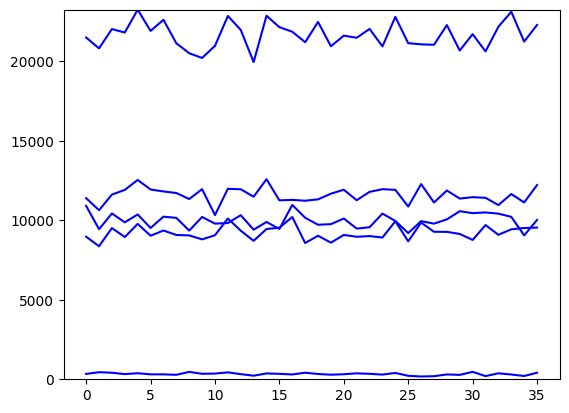

In [175]:
plt.figure()
plt.ylim(0, max_sales)

for plant_key, plant_sales in dates_per_plant.items():
    y = list(plant_sales.values())
    x = [i for i in range(len(y))]  
    plt.plot(x, y, c="blue")